In [ ]:
"""Notebook en la cual se procesan los datos para hacer el finetuning del modelo"""

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [69]:
data = pd.read_csv("dataset.csv")
data

,Header,Sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,>MG559732.1.<1.>690,GATATTGGTACTTTATATTTAATATTCGCAGGGTTTGCTGGTATTA...,Eukaryota_2759,Discosea_555280,Flabellinia_1485085,order_Vannellidae_95227,Vannellidae_95227,Clydonella_218657,Clydonella sawyeri_2201168
1,>KF895381.1.<1.>897,ACTTTATATTTATTGTTTGCAGGGTTTGCTGGTATAATAGGAACAA...,Eukaryota_2759,Discosea_555280,Flabellinia_1485085,order_Vannellidae_95227,Vannellidae_95227,Paravannella_1443143,Paravannella minima_1443144
2,>KF895380.1.<1.>897,ACTTTATATTTATTGTTTGCAGGGTTTGCTGGTATAATAGGAACAA...,Eukaryota_2759,Discosea_555280,Flabellinia_1485085,order_Vannellidae_95227,Vannellidae_95227,Paravannella_1443143,Paravannella minima_1443144
3,>KF895382.1.<1.>897,ACTTTATATTTATTGTTTGCAGGGTTTGCTGGTGTAATAGGAACAA...,Eukaryota_2759,Discosea_555280,Flabellinia_1485085,order_Vannellidae_95227,Vannellidae_95227,Paravannella_1443143,Paravannella minima_1443144
4,>MH910097.1.42453.44279,ATGCATCGTCAAGATTTAATTTTAAAAAAATTAAATAAAAAATTTG...,Eukaryota_2759,Discosea_555280,Flabellinia_1485085,order_Vannellidae_95227,Vannellidae_95227,Paravannella_1443143,Paravannella minima_1443144
...,...,...,...,...,...,...,...,...,...
1779511,>OK643902.1.2082.3653,GTGTCTCCTGCTATTCGGTGGCTCTGTTCCACAAGTCATAAAGATA...,Eukaryota_2759,Rhodophyta_2763,Stylonematophyceae_446134,Stylonematales_282338,Stylonemataceae_446133,Chroodactylon_101918,Chroodactylon ornatum_139907
1779512,>OK643915.1.1.1572,GTGTCTCCTGCTGTTCGGTGGCTATGCTCTACTAGCCACAAAGATA...,Eukaryota_2759,Rhodophyta_2763,Stylonematophyceae_446134,Stylonematales_282338,Stylonemataceae_446133,Chroothece_362227,Chroothece mobilis_362228
1779513,>OK643891.1.2209.3744,ATGATACTCGGAACATGATCAGCCAGTATCGGAACACTACTGAGCC...,Eukaryota_2759,Rhodophyta_2763,Stylonematophyceae_446134,Stylonematales_282338,Stylonemataceae_446133,Rhodosorus_101923,Rhodosorus marinus_101924
1779514,>OK643952.1.1.1602,ATGCGCTGGCTCTATTCTACTTCTCACAAGGACATCGCCCTCCTCT...,Eukaryota_2759,Rhodophyta_2763,Stylonematophyceae_446134,Stylonematales_282338,Stylonemataceae_446133,Stylonema_35154,Stylonema alsidii_35155


In [70]:
taxonomy = "Species"
taxonomy_types = data[taxonomy].unique()
print(taxonomy_types)
print(len(taxonomy_types))

['Clydonella sawyeri_2201168' 'Paravannella minima_1443144'
 'Ripella decalvata_2047822' ... 'Rhodosorus marinus_101924'
 'Stylonema alsidii_35155' 'Tsunamia transpacifica_1935457']
235083


In [71]:
data['length'] = data['Sequence'].str.len()
length_counts = data['length'].value_counts()

In [72]:
x = 50  # minimum number of samples per class

class_counts = data['Species'].value_counts()
valid_classes = class_counts[class_counts >= x].index

# Filter the dataframe
filtered_df = data[data['Species'].isin(valid_classes)]
db = filtered_df


In [73]:
column_name = 'length' 

stats = {
    'Min': db[column_name].min(),
    'Mean': db[column_name].mean(),
    'Median': db[column_name].median(),
    '95th Percentile': db[column_name].quantile(0.95),
    'Max': db[column_name].max()
}

print("Statistics:")
for stat, value in stats.items():
    print(f"{stat}: {value:.2f}")

Statistics:
Min: 100.00
Mean: 660.65
Median: 619.00
95th Percentile: 1285.25
Max: 2298.00


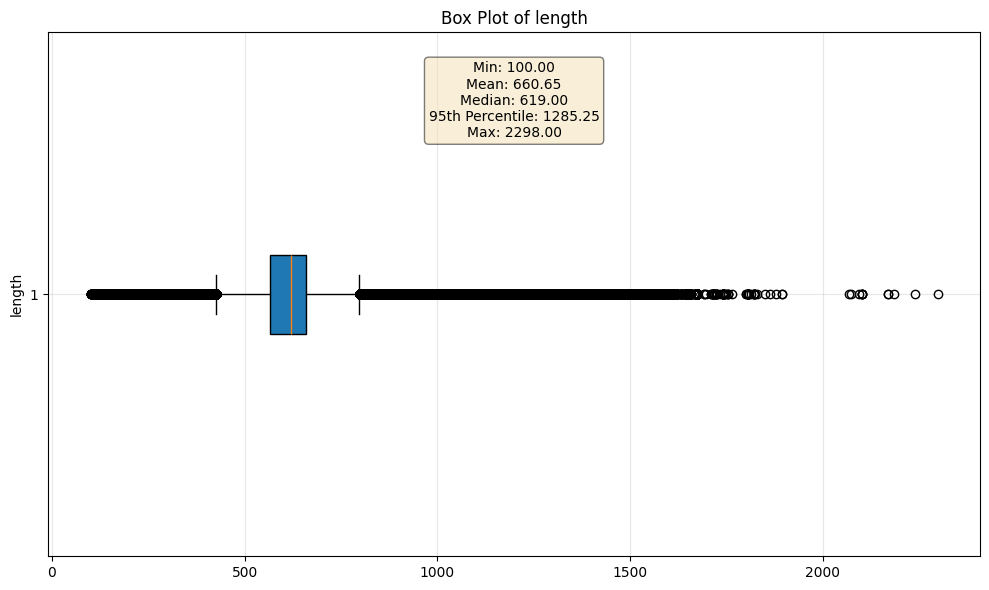

In [74]:
# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(db[column_name].dropna(), vert=False, patch_artist=True)
plt.ylabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.grid(True, alpha=0.3)

textstr = '\n'.join([f'{k}: {v:.2f}' for k, v in stats.items()])
plt.text(plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.5, 1.3,
         textstr, fontsize=10, horizontalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [119]:
x = 800  # For example, using the 95th percentile
y = 200

# Filter the dataframe 
filtered_db = db[(db['length'] >= y)].copy()
filtered_db["Sequence"] = filtered_db["Sequence"].str[:x]
filtered_db["length"] = filtered_db["Sequence"].str.len()


# Check the results
print(f"Original dataset size: {len(db)}")
print(f"Filtered dataset size: {len(filtered_db)}")
print(f"Removed {len(db) - len(filtered_db)} rows")
print(f"Removed percentage {len(filtered_db)/len(db)} rows")

Original dataset size: 696076
Filtered dataset size: 694734
Removed 1342 rows
Removed percentage 0.9980720496037789 rows


In [123]:
species_counts = filtered_db['Species'].value_counts()
species_counts_original = db["Species"].value_counts()

filtered_counts_original = species_counts_original[(species_counts_original >= 20) & (species_counts_original < 50)]
filtered_counts = species_counts[(species_counts >= 0) & (species_counts < 10)]

print(len(filtered_counts_original))
print(len(filtered_counts))
print(len(species_counts))


0
2
5465


In [76]:
columns_to_keep = ['Sequence',"Species"]
db_cleaned = db[columns_to_keep]
db_cleaned

,Sequence,Species
544,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,Emiliania huxleyi_2903
545,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,Emiliania huxleyi_2903
546,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,Emiliania huxleyi_2903
547,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,Emiliania huxleyi_2903
548,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,Emiliania huxleyi_2903
...,...,...
1778219,TGATTTTTTTCATGGTTATGCCTGTAATGATAGGGGGATTTGGTAA...,Gracilaria vermiculophylla_2608709
1778220,TTAATTTTTGGGGCGTTTTCAGGTATTTTAGGAGGTTGTATGTCAA...,Gracilaria vermiculophylla_2608709
1778221,TTACAGGATGAACAGTTTATCCTCCATTAAGTTCGATTCAAAGTCA...,Gracilaria vermiculophylla_2608709
1778222,TTAGGAGGTTGTATGTCAATGTTAATACGTATGGAATTAGCTCAAC...,Gracilaria vermiculophylla_2608709


In [77]:
taxonomy = "Species"
taxonomy_types = db_cleaned[taxonomy].unique()
print(taxonomy_types)
print(len(taxonomy_types))

['Emiliania huxleyi_2903' 'Phaeocystis globosa_33658'
 'Exserohilum turcicum_93612' ... 'Gracilaria edulis_172966'
 'Gracilaria salicornia_172968' 'Gracilaria vermiculophylla_2608709']
5465


In [78]:
# Assuming your column is called 'column_name'
column_name = 'Species'  # Replace with actual column name
df = db_cleaned.copy()

# Or if you want to convert it to an integer:
df[column_name] = df[column_name].str.split('_').str[-1].astype(int)
df


,Sequence,Species
544,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,2903
545,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,2903
546,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,2903
547,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,2903
548,ATGATGTCAATTCATTATAATAACGCTTGAGTGACGCGTTGATTAT...,2903
...,...,...
1778219,TGATTTTTTTCATGGTTATGCCTGTAATGATAGGGGGATTTGGTAA...,2608709
1778220,TTAATTTTTGGGGCGTTTTCAGGTATTTTAGGAGGTTGTATGTCAA...,2608709
1778221,TTACAGGATGAACAGTTTATCCTCCATTAAGTTCGATTCAAAGTCA...,2608709
1778222,TTAGGAGGTTGTATGTCAATGTTAATACGTATGGAATTAGCTCAAC...,2608709


In [79]:
taxonomy = "Species"
taxonomy_types = df[taxonomy].unique()
print(taxonomy_types)
print(len(taxonomy_types))

[   2903   33658   93612 ...  172966  172968 2608709]
5465


In [80]:
class_column = 'Species' 

# First split: 80% train, 20% temp (which will be split into val and test)
train_df, temp_df = train_test_split(
    df, 
    test_size=0.2, 
    stratify=df[class_column],
    random_state=42  # For reproducibility
)

# Second split: split the 20% into 10% validation and 10% test
val_df, test_df = train_test_split(
    temp_df, 
    test_size=0.5,  # 0.5 of 20% = 10% of total
    stratify=temp_df[class_column],
    random_state=42
)

# Verify the splits
print(f"Total dataset size: {len(df)}")
print(f"Train set size: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation set size: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"Test set size: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# Check class distribution in each set
print("\nClass distribution:")
print(f"Train classes: {train_df[class_column].nunique()}")
print(f"Validation classes: {val_df[class_column].nunique()}")
print(f"Test classes: {test_df[class_column].nunique()}")
print(f"Total unique classes: {df[class_column].nunique()}")

# Save to files (optional)
#train_df.to_csv('train_data.csv', index=False)
#val_df.to_csv('validation_data.csv', index=False)
#test_df.to_csv('test_data.csv', index=False)

Total dataset size: 696076
Train set size: 556860 (80.0%)
Validation set size: 69608 (10.0%)
Test set size: 69608 (10.0%)

Class distribution:
Train classes: 5465
Validation classes: 5465
Test classes: 5465
Total unique classes: 5465
